使用pdpbox工具包对心脏病数据集进行探索性分析，分析特征与患心脏病之间的先验关系，并分析两两特征之间的相互影响关系。

In [1]:
#导入工具包

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#导入数据集

df = pd.read_csv('processed_heart.csv')
df.head()

,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate,st_depression,number_major_vessels,target,sex_female,sex_male,chest_pain_type_asymptomatic,...,resting_ele_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fix defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unkonwn
0,63,145,233,150,2.3,0,1,0,1,1,...,1,1,0,0,0,1,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2,41,130,204,172,1.4,0,1,1,0,0,...,1,1,0,1,0,0,1,0,0,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,57,120,354,163,0.6,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0


### 分析单个特征对患心脏病的影响

In [3]:
#导入pdp工具包

from pdpbox import pdp,get_dataset,info_plots

特征：性别

该特征统计不同性别下患心脏病的比例

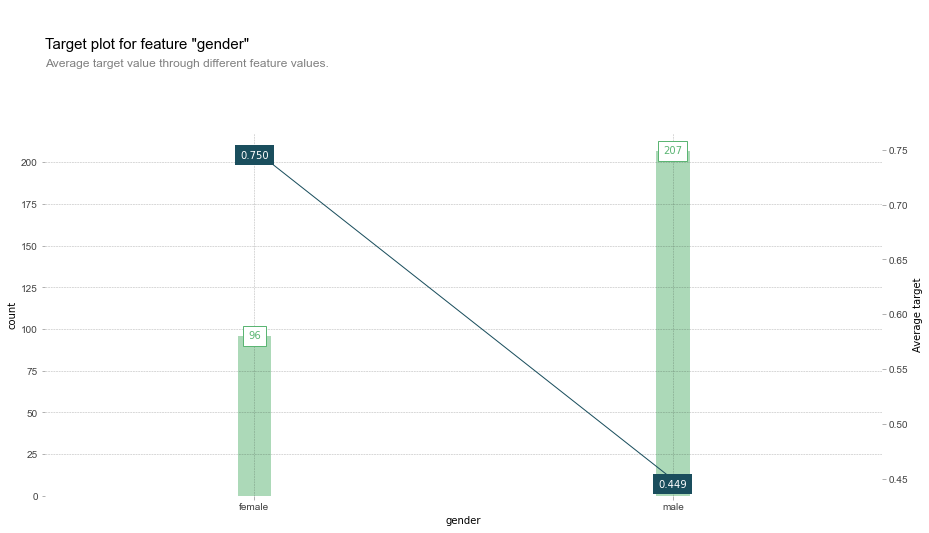

In [6]:
fig,axes,summary_df = info_plots.target_plot(df = df,feature = 'sex_male',feature_name = 'gender',target = ['target'])
_ = axes['bar_ax'].set_xticklabels(['female','male'])

In [14]:
summary_df

,x,display_column,count,target
0,0,sex_male_0,96,0.750000
1,1,sex_male_1,207,0.449275


特征：心脏周围大血管的数量

统计心脏周围大血管的数量，以及对患有心脏病的影响。

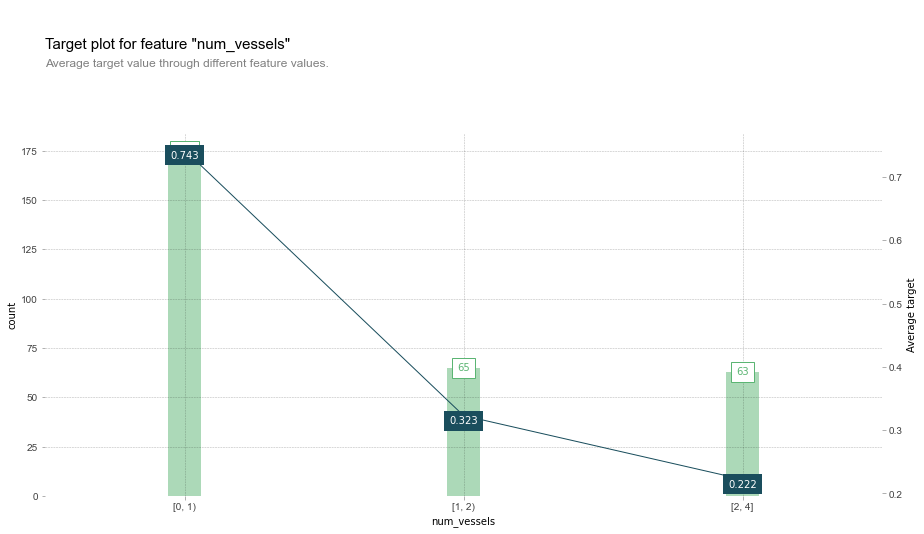

In [18]:
fig,axes,summary_df = info_plots.target_plot(df = df,feature = 'number_major_vessels',feature_name = 'num_vessels',target = ['target'])


In [19]:
summary_df

,x,display_column,value_lower,value_upper,count,target
0,0,"[0, 1)",0.0,1.0,175,0.742857
1,1,"[1, 2)",1.0,2.0,65,0.323077
2,2,"[2, 4]",2.0,4.0,63,0.222222


特征：地中海贫血症

统计地中海贫血症的分布，以及它对心脏病的影响。

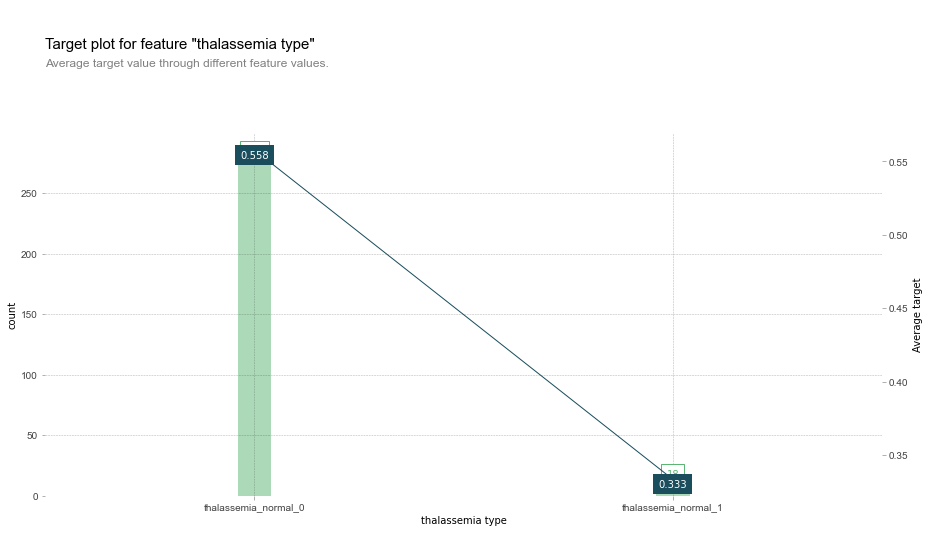

In [20]:
fig,axes,summary_df = info_plots.target_plot(df = df,feature = 'thalassemia_normal',feature_name = 'thalassemia type',target = ['target'])

特征：年龄

统计年龄的分布，以及年龄特征对患心脏病的影响

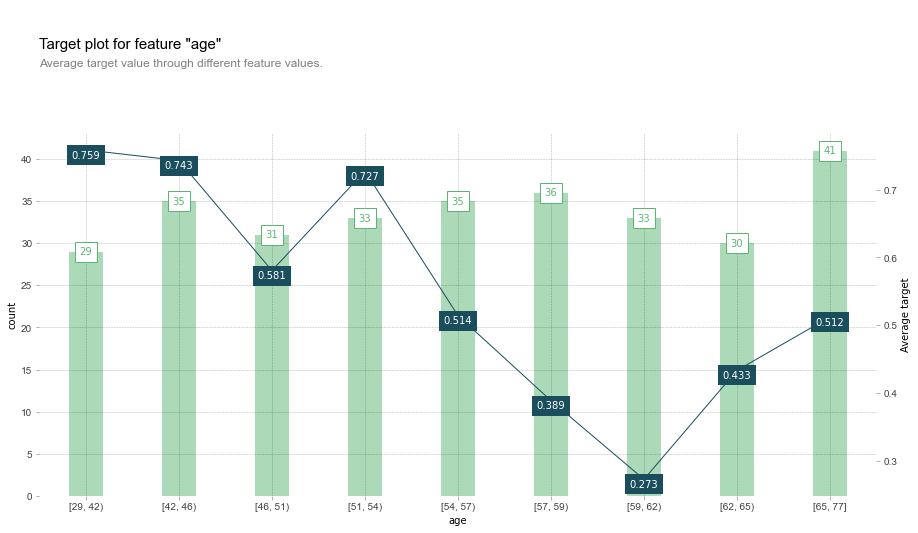

In [21]:
fig,axes,summary_df = info_plots.target_plot(df = df,feature = 'age',feature_name = 'age',target = ['target'])

特征：最大心率

统计最大心率的分布，以及最大心率对患心脏病的影响。

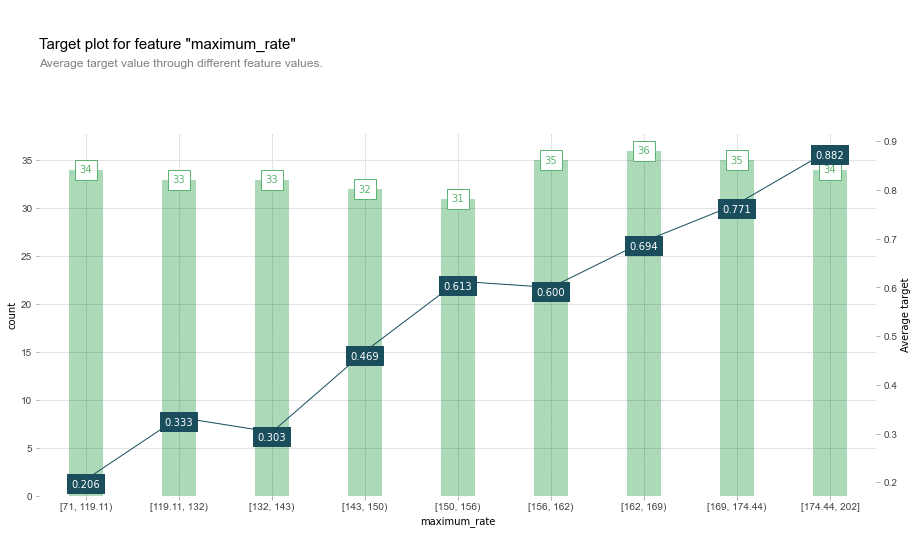

In [23]:
fig,axes,summary_df = info_plots.target_plot(df = df,feature = 'maximum_heart_rate',feature_name = 'maximum_rate',target = ['target'])

由上图可得最大心率越大，患心脏病的风险越高。

### 分析两两特征之间的相互影响

特征：心脏周围大血管的数量，最大心率

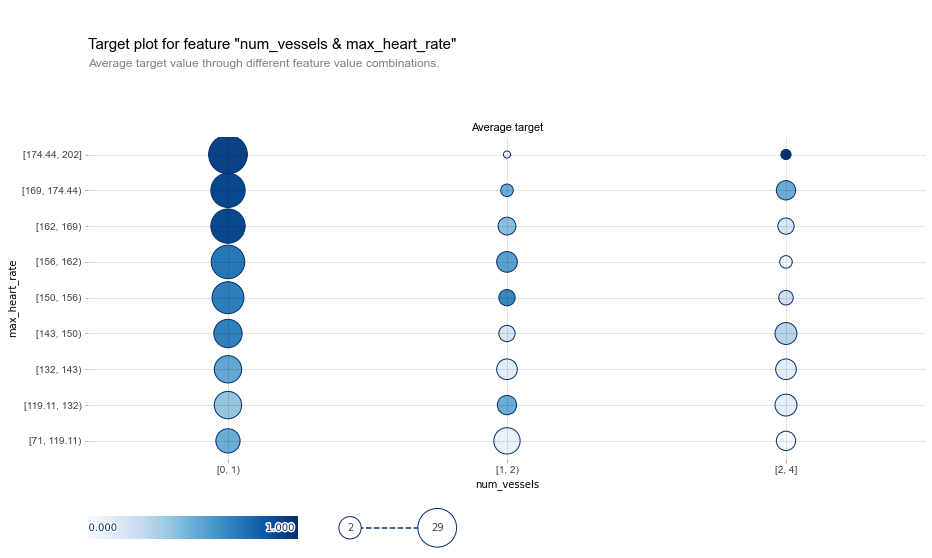

In [25]:
fig,axes,summary_df = info_plots.target_plot_interact(df = df,features = ['number_major_vessels','maximum_heart_rate'],
                                                      feature_names = ['num_vessels','max_heart_rate'],target = ['target'])

由上图可以看出，心脏周围大血管数量越少，心率越高，患心脏病的概率越高。

特征：年龄，最大心率

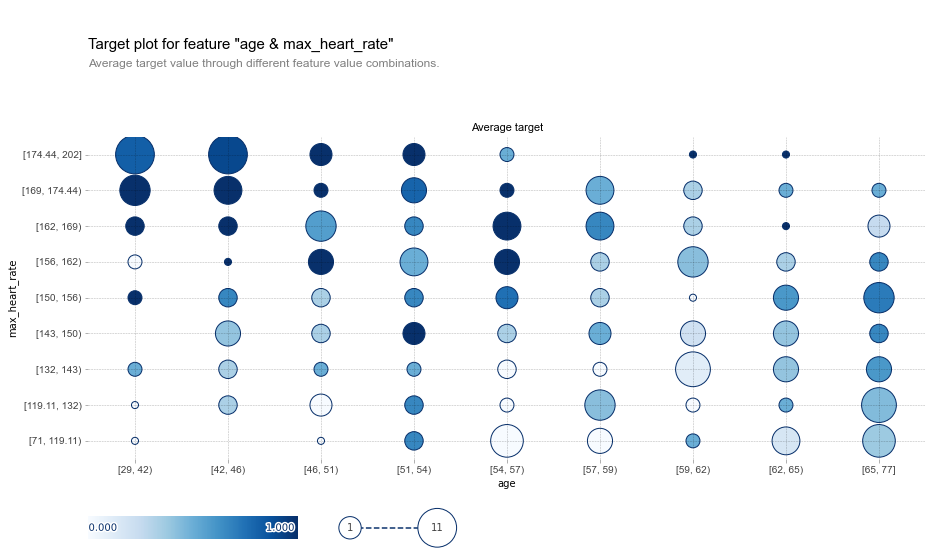

In [28]:
fig,axes,summary_df = info_plots.target_plot_interact(df = df,features = ['age','maximum_heart_rate'],
                                                      feature_names = ['age','max_heart_rate'],target = ['target'])

由上图可以看出，越年轻，心率越高，患有心脏病的概率越高。